In [3]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import os

%matplotlib inline

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
plt.rcParams["axes.unicode_minus"] = False    # 该语句解决图像中的“-”负号的乱码问题

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',200)

today = datetime.now().date()   #.strftime('%Y-%m-%d')
five_years_ago = today - timedelta(days=5*365)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [11]:
def show_index(symbol, name, from_date:datetime):
    stock_zh_index_daily_em_df = ak.stock_zh_index_daily_em(symbol=symbol)
    # print(stock_zh_index_daily_em_df)
    stock_zh_index_daily_em_df.set_index('date', inplace=True)
    stock_zh_index_daily_em_df.index = pd.to_datetime(stock_zh_index_daily_em_df.index)   
    stock_zh_index_daily_em_df = stock_zh_index_daily_em_df[stock_zh_index_daily_em_df.index > pd.to_datetime(from_date)]
    stock_zh_index_daily_em_df['close'].plot(grid=True, figsize=(12, 6), title=name)
    plt.show()
    
    
def show_index_pe(symbol, name, from_date:datetime):
    stock_index_pe_lg_df  = ak.stock_index_pe_lg(symbol=symbol)
    stock_index_pe_lg_df.set_index('日期', inplace=True)
    stock_index_pe_lg_df.index = pd.to_datetime(stock_index_pe_lg_df.index)   
    stock_index_pe_lg_df = stock_index_pe_lg_df[stock_index_pe_lg_df.index > pd.to_datetime(from_date)]
    stock_index_pe_lg_df['滚动市盈率'].plot(grid=True, figsize=(12, 6), title=name)
    plt.show()

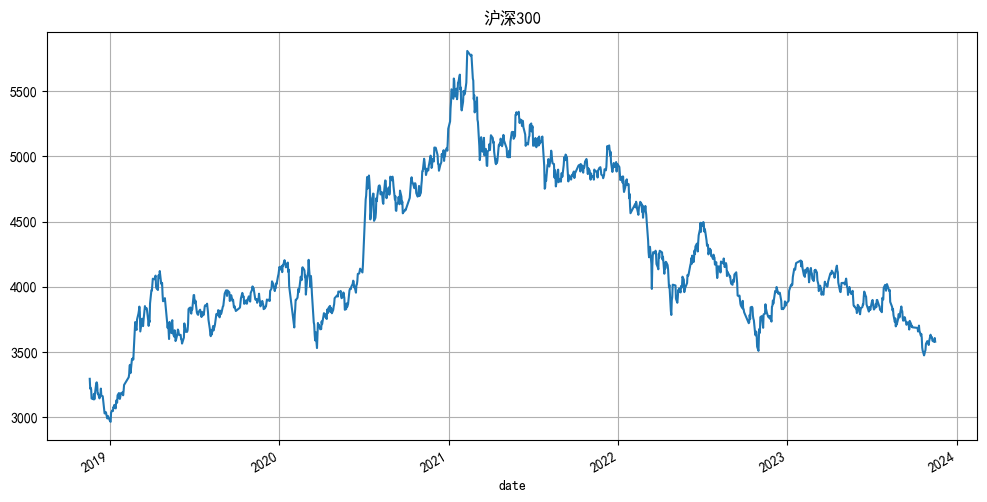

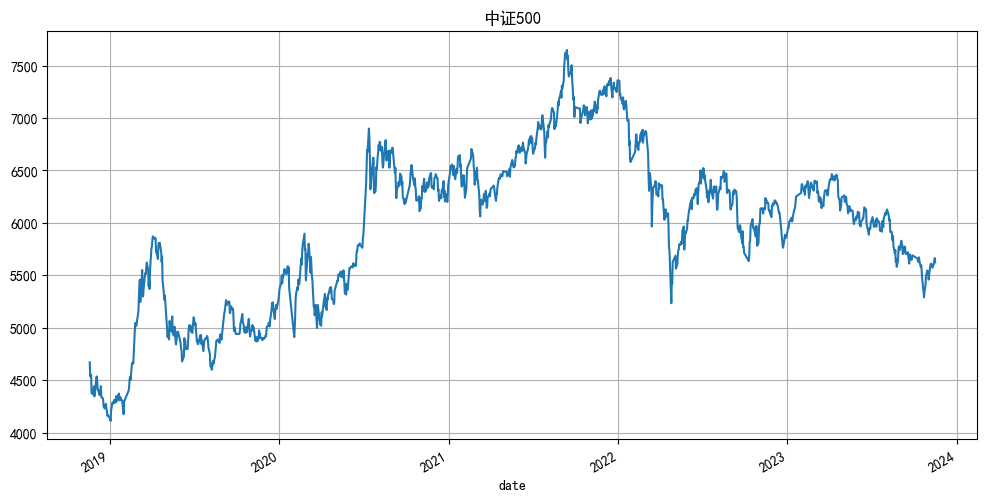

In [9]:
show_index("sh000300", '沪深300指数-5年', five_years_ago)
show_index("sh000905", '中证500指数-5年', five_years_ago)

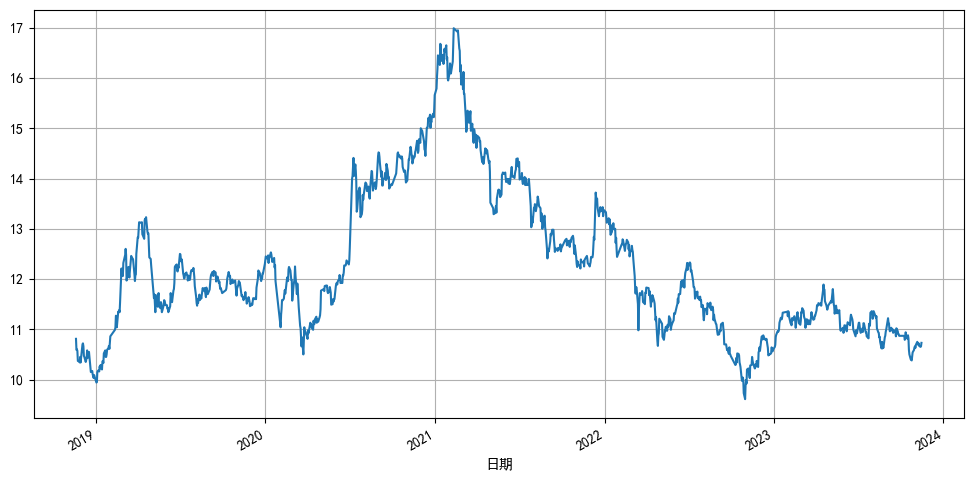

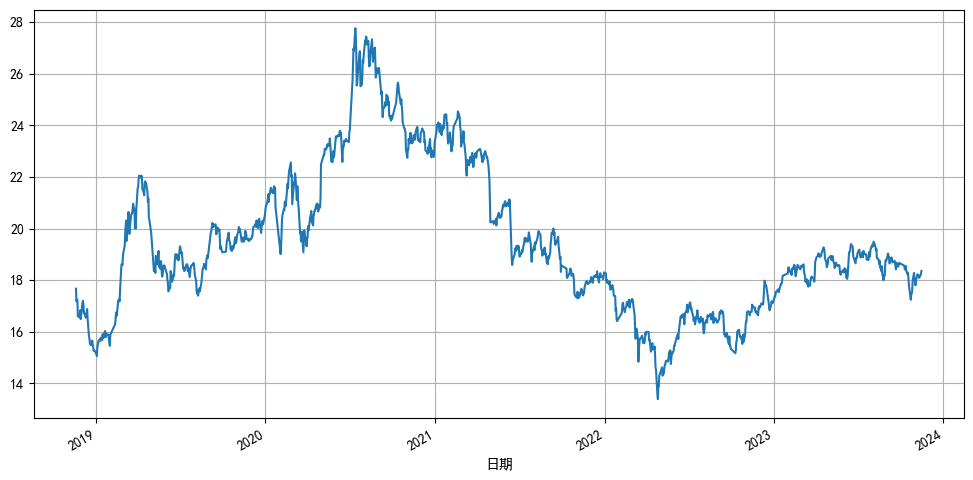

In [13]:
show_index_pe('沪深300', '沪深300PE', five_years_ago)
show_index_pe('中证500', '中证500PE', five_years_ago)

In [17]:
stock_a_indicator_df = ak.stock_a_lg_indicator(stock="000001")
print(stock_a_indicator_df)

AttributeError: module 'akshare' has no attribute 'stock_a_lg_indicator'

In [6]:
NET_VALUE_DATE = '净值日期'
ACCU_NET_VALUE = '累计净值'
TOTAL_INVESTMENT = 100.0

DATA_PATH='./data'
def load_fund_data(ticker, start_date, end_date):
    data = pd.read_csv(os.path.join(DATA_PATH, ticker + '.csv'))
    data[NET_VALUE_DATE] = pd.to_datetime(data[NET_VALUE_DATE])   
    data_sliced = data[(data[NET_VALUE_DATE] >= start_date) & (data[NET_VALUE_DATE] <= end_date)]
    data_sliced.set_index(NET_VALUE_DATE, inplace=True)
    return data_sliced


# 填补非交易日的数据，以及其他可能缺失的数据
def fill_missing_data(data, start_date, end_date):
    # 如果start_date 是非交易日
    if data[ACCU_NET_VALUE].get(start_date) == None:
        first_trade_day_net_value = data[ACCU_NET_VALUE].iloc[0]
        start_date_df = pd.DataFrame({NET_VALUE_DATE: [start_date], ACCU_NET_VALUE: [first_trade_day_net_value]}, 
                          index=[NET_VALUE_DATE])
        filled_data = pd.concat([start_date_df, data])
    
    # 填补其他的非交易日数据
    return filled_data

if __name__ == "__main__":
    
    start_date = pd.to_datetime('2020-01-01')
    end_date = pd.to_datetime('2020-1-30')
    
    data = load_fund_data('163407', start_date, end_date)
    print(fill_missing_data(data, start_date, end_date))

                          净值日期    累计净值
净值日期                2020-01-01  2.1584
2020-01-02 00:00:00        NaT  2.1584
2020-01-03 00:00:00        NaT  2.1558
2020-01-06 00:00:00        NaT  2.1433
2020-01-07 00:00:00        NaT  2.1650
2020-01-08 00:00:00        NaT  2.1430
2020-01-09 00:00:00        NaT  2.1660
2020-01-10 00:00:00        NaT  2.1640
2020-01-13 00:00:00        NaT  2.1784
2020-01-14 00:00:00        NaT  2.1741
2020-01-15 00:00:00        NaT  2.1599
2020-01-16 00:00:00        NaT  2.1488
2020-01-17 00:00:00        NaT  2.1523
2020-01-20 00:00:00        NaT  2.1621
2020-01-21 00:00:00        NaT  2.1280
2020-01-22 00:00:00        NaT  2.1314
2020-01-23 00:00:00        NaT  2.0767


In [10]:
portfolio = [['163407', '兴全沪深300', 25],
         ['050025', '博时标普500', 25],
         ['000216', '华安黄金ETF', 20],
         ['000402', '工银纯债债券A', 50]]
portfolio_df = pd.DataFrame(portfolio, columns=['ticker','name', 'target_percentage'])

percentage = portfolio_df[portfolio_df['ticker']=='000402']['target_percentage'].iloc[0]
print(percentage)

50


In [50]:
type(portfolio_df['percentage'][1])
ak.fund_money_fund_daily_em

numpy.int64

In [70]:
money_fund = ak.fund_money_fund_info_em(fund="340005")
print(money_fund)

            净值日期   每万份收益 7日年化收益率 申购状态 赎回状态
0     2023-11-01  0.4165  2.0440         1
1     2023-10-31  0.6059  2.0710         1
2     2023-10-30  0.4487  2.0520         1
3     2023-10-29  1.2056  2.1050         0
4     2023-10-27  0.6022  2.0330         1
...          ...     ...     ...  ...  ...
5150  2006-05-19  0.3010  1.6110         1
5151  2006-05-18  0.2955  1.5890         1
5152  2006-05-17  0.2538  1.6250         1
5153  2006-05-16  0.2899  1.6230         1
5154  2006-05-15  7.4263  1.5960         3

[5155 rows x 5 columns]


In [68]:
fund_open_fund_info_em_df = ak.fund_open_fund_info_em(fund="000216", indicator="累计净值走势")
print(type(fund_open_fund_info_em_df['净值日期'][1]))

<class 'datetime.date'>


In [67]:
fund_open_fund_info_em_df.info



<bound method DataFrame.info of             净值日期    累计净值
0     2013-08-22  1.0000
1     2013-08-23  1.0000
2     2013-08-30  0.9990
3     2013-09-06  0.9960
4     2013-09-09  0.9980
...          ...     ...
2472  2023-10-26  1.6929
2473  2023-10-27  1.6984
2474  2023-10-30  1.7028
2475  2023-10-31  1.7027
2476  2023-11-01  1.6976

[2477 rows x 2 columns]>

In [37]:
start_date = dt.date(2022,1,1)
print(type(start_date))

<class 'datetime.date'>


In [51]:
# 过滤出2022年的数据
start_date = dt.date(2022,4,1)
end_date = dt.date(2022,12,31)
filtered_data = fund_open_fund_info_em_df[(fund_open_fund_info_em_df['净值日期'] >= start_date) & (fund_open_fund_info_em_df['净值日期'] <= end_date)]

print(filtered_data.head)


<bound method NDFrame.head of             净值日期    累计净值
2092  2022-04-01  1.4265
2093  2022-04-06  1.4195
2094  2022-04-07  1.4231
2095  2022-04-08  1.4261
2096  2022-04-11  1.4374
...          ...     ...
2272  2022-12-27  1.4660
2273  2022-12-28  1.4697
2274  2022-12-29  1.4636
2275  2022-12-30  1.4748
2276  2022-12-31  1.4748

[185 rows x 2 columns]>


In [15]:
fund_open_fund_info_em_df.info

<bound method DataFrame.info of             净值日期    累计净值
0     2013-08-22  1.0000
1     2013-08-23  1.0000
2     2013-08-30  0.9990
3     2013-09-06  0.9960
4     2013-09-09  0.9980
...          ...     ...
2472  2023-10-26  1.6929
2473  2023-10-27  1.6984
2474  2023-10-30  1.7028
2475  2023-10-31  1.7027
2476  2023-11-01  1.6976

[2477 rows x 2 columns]>